In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Net_2 import *
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.preprocessing import StandardScaler

cat_cols=['Surname', 'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'binned_Age']
num_cols=['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

data = pd.read_csv('data_ex/train.csv')
# lab_CustomerId=LabelEncoder()
# lab_Surname=LabelEncoder()
lab_Gender=LabelEncoder()
lab_Geography=LabelEncoder()
lab_binned_Age=LabelEncoder()
# data['CustomerId']=lab_CustomerId.fit_transform(data['CustomerId'])
# data['Surname']=lab_Surname.fit_transform(data['Surname'])
data['Gender']=lab_Gender.fit_transform(data['Gender'])
data['Geography']=lab_Geography.fit_transform(data['Geography'])
data['binned_Age']=pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
data['binned_Age']=lab_binned_Age.fit_transform(data['binned_Age'])
scalar=StandardScaler()
data[num_cols]=scalar.fit_transform(data[num_cols])
X=data.drop(['Exited', 'id' , 'CustomerId' , 'Surname'], axis=1).values
y=data['Exited'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

array([[ 0.70591061,  0.        ,  0.        , ...,  0.        ,
        -0.51491242,  4.        ],
       [ 0.88068538,  1.        ,  1.        , ...,  0.        ,
         0.98807648,  3.        ],
       [-1.80335564,  2.        ,  0.        , ...,  0.        ,
         0.97174012,  2.        ],
       ...,
       [-0.67980358,  1.        ,  1.        , ...,  0.        ,
        -0.45280959,  1.        ],
       [-0.055608  ,  1.        ,  1.        , ...,  0.        ,
         0.46634365,  2.        ],
       [ 0.50616803,  1.        ,  0.        , ...,  1.        ,
        -0.51314278,  2.        ]])

In [18]:
# model=tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
net = Network([X_train.shape[1],11,5,2, 1],[sigmoid,sigmoid,sigmoid,sigmoid])  # 修改网络结构以匹配Sequential模型
history = net.train(X_train, y_train, 15, 32, 0.1)

Epoch 0: (0.8287471502041249, 0.6164443472556309, 0.5045641668158224, 0.5549212598425197, 52697.88669843534)
Epoch 1: (0.8380634264203534, 0.6691438303142901, 0.4641489171290496, 0.5481061887047685, 49700.6906754433)
Epoch 2: (0.8356548281790845, 0.6648517206745256, 0.4502237336674423, 0.5368820968155041, 50397.161690716566)
Epoch 3: (0.8108417217690321, 0.5842773381909262, 0.3674243780204045, 0.4511450046151818, 58335.93703229246)
Epoch 4: (0.8209532898573777, 0.592395044735031, 0.49300161088240557, 0.5381474317644531, 53983.538278741056)
Epoch 5: (0.8348065168488263, 0.7989846724592404, 0.29296581349561485, 0.42872858714442874, 51270.348469204844)
Epoch 6: (0.829413680535042, 0.6264306068108563, 0.48004295686414894, 0.5435531595800738, 52229.8974789371)
Epoch 7: (0.8399418300802108, 0.6576154951114406, 0.5080365133345266, 0.5732288553194926, 50250.13744454314)
Epoch 8: (0.8498791913775212, 0.698284708986952, 0.5115088598532307, 0.5904789454109673, 48609.766607916616)
Epoch 9: (0.8436

In [24]:
# 评估网络性能
acc, precision, recall, f1,cost= net.evaluate(zip(X_test, y_test))
print('acc:', acc)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('cost:', cost)

acc: 0.8278849940921623
precision: 0.7085330776605945
recall: 0.317348983681649
f1: 0.43835887296094905
cost: 0


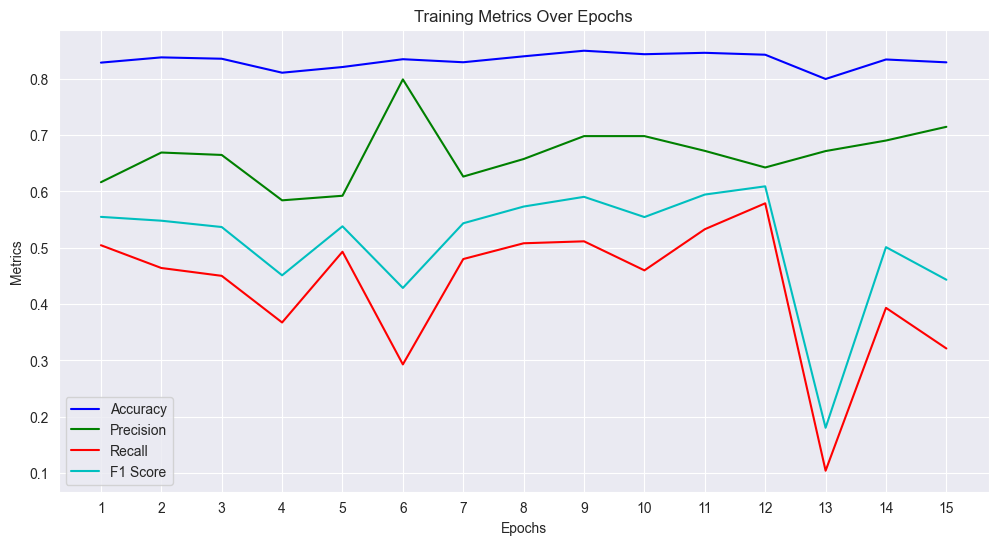

In [23]:
# 将history转置，使得每个指标为一个列表
acc, precision, recall, f1, _ = zip(*history)

epochs = range(1, len(history) + 1)

# 绘制每个指标的曲线
plt.figure(figsize=(12, 6))

plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, precision, 'g', label='Precision')
plt.plot(epochs, recall, 'r', label='Recall')
plt.plot(epochs, f1, 'c', label='F1 Score')
#x轴刻度为整数
plt.xticks(epochs)
plt.title('Training Metrics Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()

plt.grid(True)
plt.savefig("image/baseline.svg")

In [25]:
#预测test数据
lab = LabelEncoder()
data_test = pd.read_csv('data_ex/test.csv')
data_test['Gender']=lab_Gender.transform(data_test['Gender'])
data_test['Geography']=lab_Geography.transform(data_test['Geography'])
data_test['binned_Age']=pd.cut(data_test['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
data_test['binned_Age']=lab_binned_Age.transform(data_test['binned_Age'])
data_test[num_cols]=scalar.transform(data_test[num_cols])
X= data_test.drop([ 'id', 'CustomerId', 'Surname'], axis=1).values
X

array([[-0.87954617,  0.        ,  0.        , ...,  1.        ,
         0.96240438,  1.        ],
       [ 0.33139326,  0.        ,  0.        , ...,  0.        ,
        -0.79585193,  3.        ],
       [-0.00567235,  0.        ,  0.        , ...,  0.        ,
         0.52308308,  2.        ],
       ...,
       [ 0.6934267 ,  0.        ,  1.        , ...,  0.        ,
        -1.91454063,  2.        ],
       [ 0.65597497,  0.        ,  0.        , ...,  1.        ,
         0.91945243,  2.        ],
       [-0.44260926,  0.        ,  0.        , ...,  0.        ,
        -1.75699932,  2.        ]])

In [26]:
#预测
# #对X的每一行进行前向传播
y_pred = np.array([net.Forward_prop(x) for x in X])
y_pred

array([[0.03740995],
       [0.71876381],
       [0.03752246],
       ...,
       [0.03740995],
       [0.15158035],
       [0.44111267]])

In [27]:
#保存结果
result = pd.DataFrame({'id':data_test['id'], 'Exited':y_pred[:,0]})
result.to_csv('result.csv',index=False)

In [28]:
#保存模型
import pickle
with open('model-train.pkl', 'wb') as f:
    pickle.dump(net, f)